# About the Dataset
* age: Age of the individual

* workclass: Type of employer (e.g., Private, Government)

* fnlwgt: Census weight assigned to each record (used for sampling — not always needed in modeling)

* education: Highest level of education (e.g., Bachelors, HS-grad)

* education-num: Numeric encoding of education level

* marital-status: Marital situation (e.g., Married, Never-married)

* occupation: Type of job (e.g., Exec-managerial, Sales)

* relationship: Family role (e.g., Husband, Wife, Not-in-family)

* race: Race (e.g., White, Black, Asian-Pac-Islander)

* sex: Gender (Male or Female)

* capital-gain: Investment income from capital gains

* capital-loss: Losses from investments

* hours-per-week: Number of hours worked each week

* native-country: Country of origin

* income: Target variable — either <=50K or >50K

First 5 Rows of the data
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0  

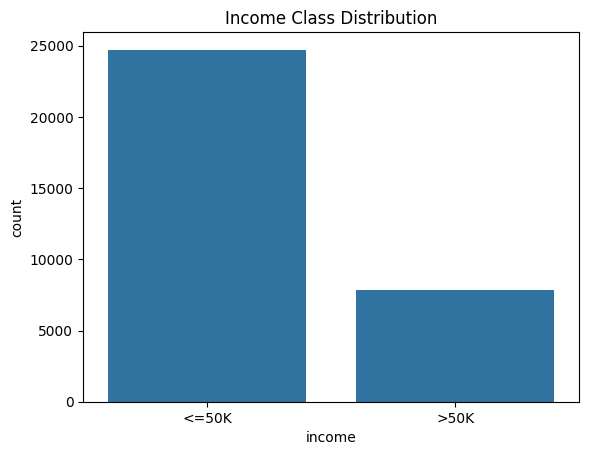

In [1]:
#@title Exploratory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
df = pd.read_csv(url, header=None, names=column_names, na_values=' ?', skipinitialspace=True)

# --- EDA ---
print("First 5 Rows of the data")
print(df.head())
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nIncome distribution:\n", df['income'].value_counts())
print("\nSummary statistics:\n", df.describe(include='all'))

# Visualize class imbalance
sns.countplot(data=df, x='income')
plt.title('Income Class Distribution')
plt.show()

# --- Cleaning ---
# Drop rows with missing values
df_clean = df.dropna()

# Drop 'fnlwgt', 'capital-gain', and 'capital-loss' from the features
df_clean = df_clean.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'], errors='ignore')

# Encode categorical features
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Split into features and target
X = df_clean.drop('income_>50K', axis=1)
y = df_clean['income_>50K']

feature_names = X.columns.tolist()

In [ ]:
pd.set_option('display.max_columns', None)
df_clean[df_clean["income_>50K"] == True].sample(5)

,age,education-num,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_>50K
31733,41,12,60,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
6227,52,13,55,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
17867,45,13,45,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
22331,30,9,40,False,False,False,True,False,False,False,

In [ ]:
!pip install imbalanced-learn


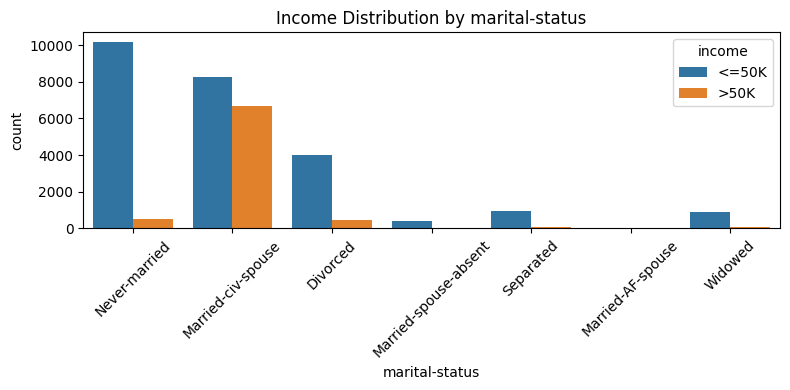

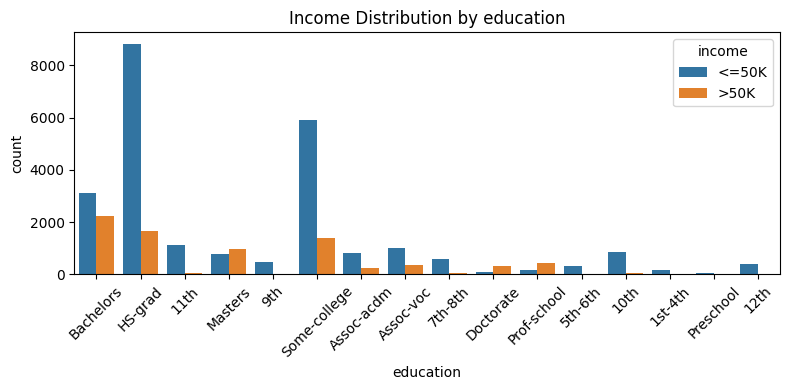

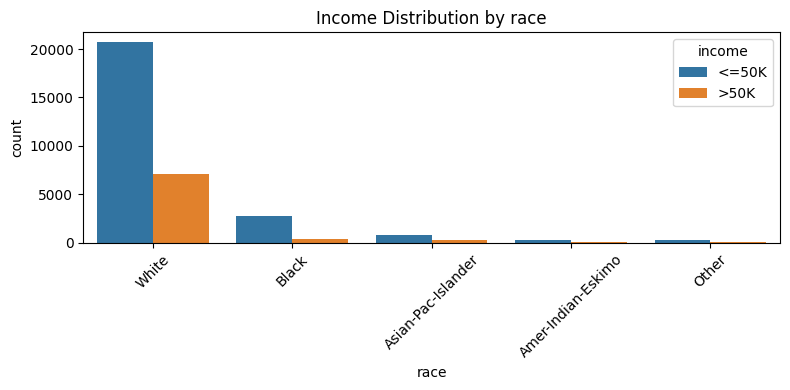

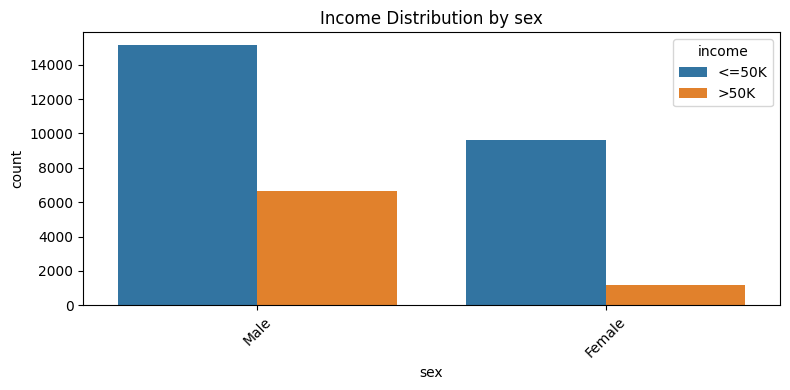

In [ ]:
#@title Visualize the count of income levels within categories.
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = ['marital-status', 'education', 'race', 'sex']
for var in categorical_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=var, hue='income')
    plt.title(f'Income Distribution by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


##Crosstab + Chi-Square Test of Independence
A p-value < 0.05 suggests a statistically significant relationship between the variable and income.

In [ ]:
#@title To statistically test if there’s an association between the categorical variable and income.
import scipy.stats as stats

for var in categorical_vars:
    table = pd.crosstab(df[var], df['income'])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    print(f'{var}: p-value = {p:.4f}')


marital-status: p-value = 0.0000
education: p-value = 0.0000
race: p-value = 0.0000
sex: p-value = 0.0000


# Classification Modeling

####Stratified K-Fold (n = 5)
* In 5-fold cross-validation, the data is split into five equal-sized folds.
* Each iteration uses 80% of the data for training and 20% for validation, rotating the test set each time.
* The “stratified” aspect ensures that each fold maintains the same class distribution as the full dataset.

In [ ]:
#@title Modeling with Grid Search & K-Fold Cross Validation Using Smote to handle class imbalance
# smote_modeling.py

from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import pandas as pd
import numpy as np
import joblib


# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Set up Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --------------------------
# Logistic Regression
# --------------------------
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=2000))
])
logreg_params = {'clf__C': [0.1, 1, 10]}

logreg_grid = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=logreg_params,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)
logreg_grid.fit(X_resampled, y_resampled)
print("\n✅ Logistic Regression")
print("Best Accuracy:", logreg_grid.best_score_)
print("Best Params:", logreg_grid.best_params_)

# --------------------------
# Random Forest
# --------------------------
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)
rf_grid.fit(X_resampled, y_resampled)
print("\n🌲 Random Forest")
print("Best Accuracy:", rf_grid.best_score_)
print("Best Params:", rf_grid.best_params_)

# --------------------------
# XGBoost
# --------------------------
xgb = XGBClassifier(eval_metric='logloss', use_label_encoder=False, random_state=42)
xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6]
}

xgb_grid = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    cv=skf,
    scoring='accuracy',
    n_jobs=-1
)
xgb_grid.fit(X_resampled, y_resampled)
print("\n🚀 XGBoost")
print("Best Accuracy:", xgb_grid.best_score_)
print("Best Params:", xgb_grid.best_params_)

# # Optional: Save the best model (you can choose which one to save)
# joblib.dump(xgb_grid.best_estimator_, "income_model.pkl")
# joblib.dump(X.columns.tolist(), "model_features.pkl")



✅ Logistic Regression
Best Accuracy: 0.8586569579288026
Best Params: {'clf__C': 0.1}

🌲 Random Forest
Best Accuracy: 0.874049352750809
Best Params: {'max_depth': None, 'n_estimators': 200}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:45:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🚀 XGBoost
Best Accuracy: 0.877002427184466
Best Params: {'max_depth': 6, 'n_estimators': 200}


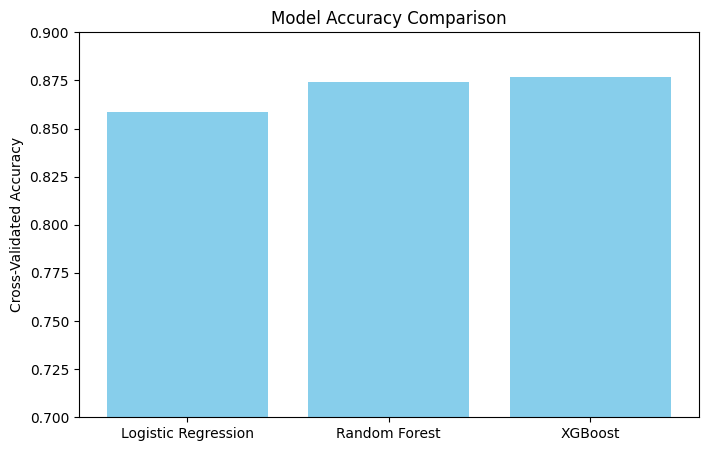

In [ ]:
#@title Visual Comparison of Accuracy scores for the Different Models
model_scores = {
    'Logistic Regression': logreg_grid.best_score_,
    'Random Forest': rf_grid.best_score_,
    'XGBoost': xgb_grid.best_score_
}

# Bar plot of model performance
plt.figure(figsize=(8, 5))
plt.bar(model_scores.keys(), model_scores.values(), color='skyblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Cross-Validated Accuracy')
plt.ylim(0.7, 0.9)
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:49:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


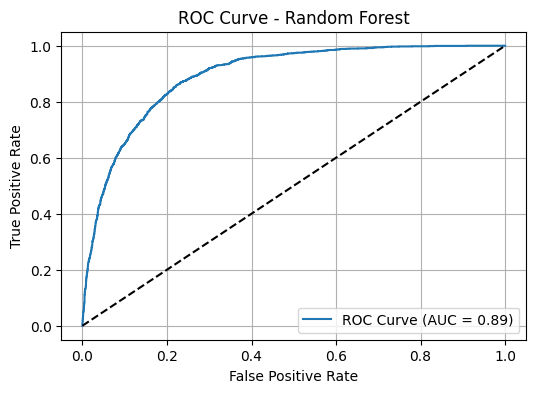

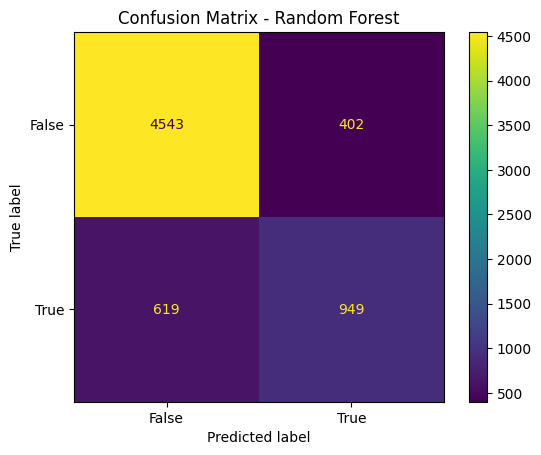

Classification Report - Random Forest
              precision    recall  f1-score   support

       False       0.88      0.92      0.90      4945
        True       0.70      0.61      0.65      1568

    accuracy                           0.84      6513
   macro avg       0.79      0.76      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [ ]:
#@title Accuracy Analysis for Best Fitting Model
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Evaluation for Best Model: Random Forest
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Best Model
best_model = xgb_grid.best_estimator_
# Drop 'fnlwgt', 'capital-gain', and 'capital-loss' from the features
X = X.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'], errors='ignore')

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Use the best model from grid search
# best_model = xgb_grid.best_estimator_
best_model.fit(X_train, y_train)

# Predict probabilities and labels
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = best_model.predict(X_test)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Classification Report
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred))

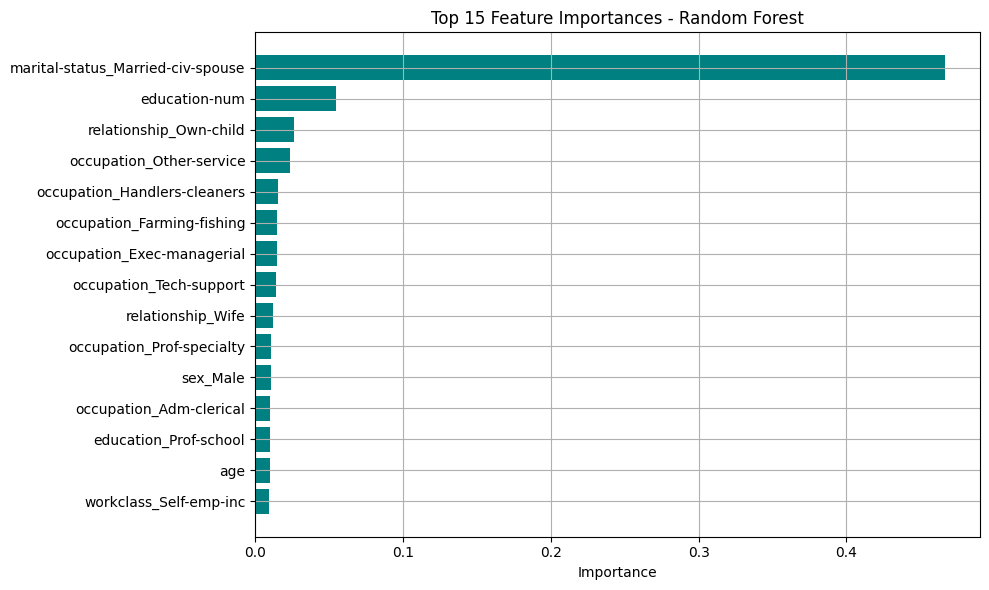

In [ ]:
#@title Important Features to the Prediction
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extract feature importances from best Random Forest model
importances = best_model.feature_importances_
feature_names = X.columns

# Create DataFrame of feature names and their importance scores
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance and select top 15
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_df['Feature'], feat_df['Importance'], color='teal')
plt.gca().invert_yaxis()
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.grid(True)
plt.tight_layout()
plt.show()


# Save the best model


In [ ]:
#@title Step 1: Save the Best Model & Model Features
import joblib

#@title Save the best model (you can choose which one to save)
joblib.dump(xgb_grid.best_estimator_, "income_model.pkl")
joblib.dump(X.columns.tolist(), "model_features.pkl")


['income_model.pkl']

In [ ]:
#@title Create Your app.py Flask File
from flask import Flask, request, jsonify
import joblib
import pandas as pd

# Load the trained model
model = joblib.load('income_model.pkl')

# Define expected feature columns (excluding 'fnlwgt', 'capital-gain', 'capital-loss')
feature_columns = [
    col for col in model.feature_names_in_  # scikit-learn 1.0+ stores this
]

# Initialize Flask app
app = Flask(__name__)

@app.route('/')
def index():
    return "Income Classification API is live!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Parse input JSON into a DataFrame
        input_data = request.get_json()
        input_df = pd.DataFrame([input_data])

        # Reorder columns to match training
        input_df = input_df[feature_columns]

        # Predict
        prediction = model.predict(input_df)[0]
        predicted_class = '>50K' if prediction == 1 else '<=50K'

        return jsonify({
            'prediction': predicted_class
        })
    except Exception as e:
        return jsonify({'error': str(e)})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
